# Loading data from survey and turning it into graphs   

In [99]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("..")
from config.configuration import DATA_FOLDER_PATH

### Processing survey data 

In [100]:
# load data
survey = pd.read_csv(f"../../{DATA_FOLDER_PATH}/survey_data/CES-eCommerce-variation_12.01.csv")

gpt4o_avg = pd.read_csv(f"../../{DATA_FOLDER_PATH}/averages/contemp_GPT-4o_averages.csv")
gpt4o_avg.set_index("#", inplace=True)
gpt4o_raw = pd.read_csv(f"../../{DATA_FOLDER_PATH}/raw_data/contemp_GPT-4o_raw_data.csv")
gpt4o_raw.set_index("#", inplace=True)

gpt4omini_avg = pd.read_csv(f"../../{DATA_FOLDER_PATH}/averages/contemp_GPT-4o-mini_averages.csv")
gpt4omini_avg.set_index("#", inplace=True)
gpt4omini_raw = pd.read_csv(f"../../{DATA_FOLDER_PATH}/raw_data/contemp_GPT-4o-mini_raw_data.csv")
gpt4omini_raw.set_index("#", inplace=True)

# gemini_avg = pd.read_csv(f"../../{DATA_FOLDER_PATH}/averages/contemp_Gemini_averages.csv")
# gemini_avg.set_index("#", inplace=True)
# gemini_raw = pd.read_csv(f"../../{DATA_FOLDER_PATH}/raw_data/contemp_Gemini_raw_data.csv")
# gemini_raw.set_index("#", inplace=True)

grok_avg = pd.read_csv(f"../../{DATA_FOLDER_PATH}/averages/contemp_Grok_averages.csv")
grok_avg.set_index("#", inplace=True)
grok_raw = pd.read_csv(f"../../{DATA_FOLDER_PATH}/raw_data/contemp_Grok_raw_data.csv")
grok_raw.set_index("#", inplace=True)

In [101]:
survey

,StartDate,EndDate,Status,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,DistributionChannel,UserLanguage,...,Q11_VPN_prices,Q12_free_trials,Q13_not_reporting,Q14_subscritpion,Q15_fake_review,Q16_ad-blockers,Q17_website_errors,Block_2_Selected,Block_3_Selected,Block_4_Selected
0,Start Date,End Date,Response Type,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Distribution Channel,User Language,...,Rate the following items on a 5 point scale fr...,Rate the following items on a 5 point scale fr...,Rate the following items on a 5 point scale fr...,Rate the following items on a 5 point scale fr...,Rate the following items on a 5 point scale fr...,Rate the following items on a 5 point scale fr...,Rate the following items on a 5 point scale fr...,Block_2_Selected,Block_3_Selected,Block_4_Selected
1,"{""ImportId"":""startDate"",""timeZone"":""Europe/Ber...","{""ImportId"":""endDate"",""timeZone"":""Europe/Berlin""}","{""ImportId"":""status""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""Europe/...","{""ImportId"":""_recordId""}","{""ImportId"":""distributionChannel""}","{""ImportId"":""userLanguage""}",...,"{""ImportId"":""QID10_2""}","{""ImportId"":""QID10_3""}","{""ImportId"":""QID10_4""}","{""ImportId"":""QID7_1""}","{""ImportId"":""QID7_2""}","{""ImportId"":""QID7_3""}","{""ImportId"":""QID7_4""}","{""ImportId"":""Block_2_Selected""}","{""ImportId"":""Block_3_Selected""}","{""ImportId"":""Block_4_Selected""}"
2,2025-01-05 12:09:55,2025-01-05 12:14:50,IP Address,100,295,True,2025-01-05 12:14:51,R_4niMnplWr4ihYaV,anonymous,EN,...,3,4,2,5,1,3,4,1,1,1
3,2025-01-05 12:10:44,2025-01-05 12:16:47,IP Address,100,362,True,2025-01-05 12:16:47,R_2meQ6iKnCs1sXCW,anonymous,EN,...,4,3,3,3,1,3,5,1,1,1
4,2025-01-05 12:14:28,2025-01-05 12:19:46,IP Address,100,318,True,2025-01-05 12:19:47,R_2DokGqfbop5T2bL,anonymous,EN,...,3,5,3,5,2,4,5,1,1,1
5,2025-01-05 12:22:15,2025-01-05 12:25:33,IP Address,100,197,True,2025-01-05 12:25:34,R_8HScyeA5rEzBmc9,anonymous,EN,...,5,5,3,5,1,5,3,1,1,1
6,2025-01-05 12:22:34,2025-01-05 12:28:39,IP Address,100,364,True,2025-01-05 12:28:39,R_4aGV4Z2lFJtkWGJ,anonymous,EN,...,3,4,4,5,3,4,5,1,1,1
7,2025-01-05 12:30:41,2025-01-05 12:35:44,IP Address,100,302,True,2025-01-05 12:35:46,R_2zx3x35a3c5hET8,anonymous,EN,...,4,4,2,2,1,2,4,1,1,1
8,2025-01-05 12:35:02,2025-01-05 12:39:43,IP Address,100,281,True,2025-01-05 12:39:43,R_8k0uH8Ij4mCC14C,anonymous,EN,...,3,4,2,4,2,3,4,1,1,1
9,2025-01-05 12:37:23,2025-01-05 12:43:34,IP Address,100,370,True,2025-01-05 12:43:35,R_2ROGgPsm8IfaRHP,anonymous,EN,...,5,5,1,5,1,3,3,1,1,1


In [102]:
# removing demographic data
survey = survey.drop(columns=[survey.columns[i] for i in [0, 1, 2, 5, 7, 9]])

In [103]:
# removing survey variables data
survey = survey.drop(survey.columns[:12], axis=1)

In [104]:
# reordering responses according to questionnaire structure
column_oder = ["Q4_company-license", "Q14_subscritpion", "Q6_screenshots", "Q8_streaming", "Q16_ad-blockers", "Q2_VPN_bypass", 
               "Q11_VPN_prices", "Q12_free_trials", "Q7_bots", "Q5_status", "Q9_loyalty", "Q1_refunds", "Q15_fake_review", 
               "Q10_return", "Q17_website_errors", "Q3_honest_reviews", "Q13_not_reporting"]
survey = survey[column_oder]

In [105]:
# dropping header rows
survey = survey.drop([0, 1])

In [106]:
survey = survey.astype(int)

In [107]:
survey_avgs = survey.mean()

In [108]:
YLIM = (0, 5.9)
def make_graphs(
    df: pd.DataFrame, slices: list, labels: list, errors: pd.DataFrame, prefix: str
) -> list[plt.Figure]:
    images = []
    capsizes = {"downloading": 7, "passive": 3}
    default_capsize = 4
    def get_capsize(key):
        return capsizes.get(key, default_capsize)
    
    for sl, lbl in zip(slices, labels):
        fig, ax = plt.subplots()
        df.iloc[sl].plot(
            kind="bar",
            ylim=YLIM,
            yerr=errors,
            capsize=get_capsize(lbl),
            ecolor="darkred",
            color=["#5a9bd4"],
            ax=ax,
            title=lbl,
            xlabel="Question",
            ylabel="Avg Score",
            figsize=(10, 5),
            rot=0,
        ).legend([f"{prefix}"])
        fig.tight_layout()
        images.append(fig)
    return images

In [109]:
survey.std()

Q4_company-license    1.225142
Q14_subscritpion      1.248376
Q6_screenshots        1.052980
Q8_streaming          1.299226
Q16_ad-blockers       0.971677
Q2_VPN_bypass         1.090097
Q11_VPN_prices        1.201190
Q12_free_trials       1.204833
Q7_bots               1.034314
Q5_status             1.062801
Q9_loyalty            1.177164
Q1_refunds            0.786039
Q15_fake_review       0.958218
Q10_return            1.056212
Q17_website_errors    1.116436
Q3_honest_reviews     1.007601
Q13_not_reporting     1.031800
dtype: float64

In [110]:
slices2 = [slice(0,4), slice(4, 9), slice(9, 14), slice(14,16), slice(16,None)]
labels2 = ["RM", "SE", "TV", "PDC", "NDC"]
error_std = survey.std()
survey_errors = error_std
n = survey.shape[0]
print(n)
# sem = error_std/(n**0.5)

56


In [111]:
survey_errors

Q4_company-license    1.225142
Q14_subscritpion      1.248376
Q6_screenshots        1.052980
Q8_streaming          1.299226
Q16_ad-blockers       0.971677
Q2_VPN_bypass         1.090097
Q11_VPN_prices        1.201190
Q12_free_trials       1.204833
Q7_bots               1.034314
Q5_status             1.062801
Q9_loyalty            1.177164
Q1_refunds            0.786039
Q15_fake_review       0.958218
Q10_return            1.056212
Q17_website_errors    1.116436
Q3_honest_reviews     1.007601
Q13_not_reporting     1.031800
dtype: float64

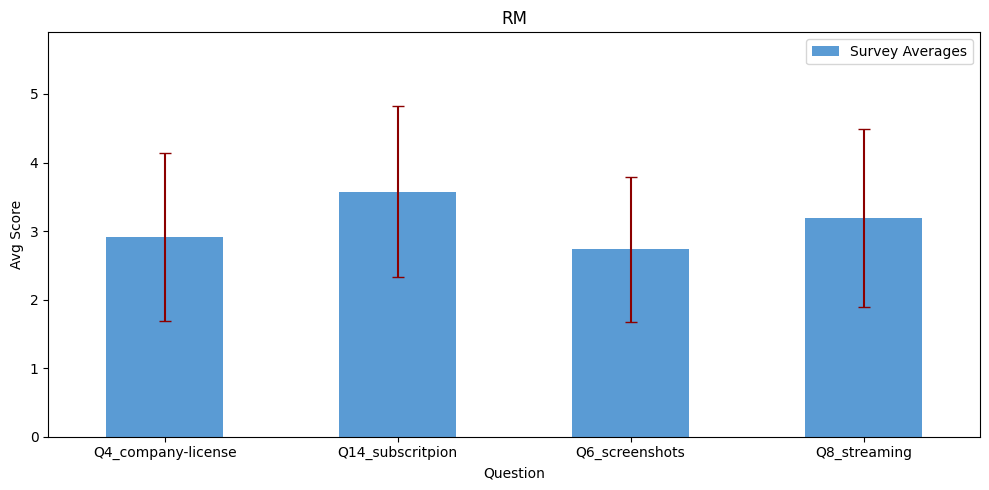

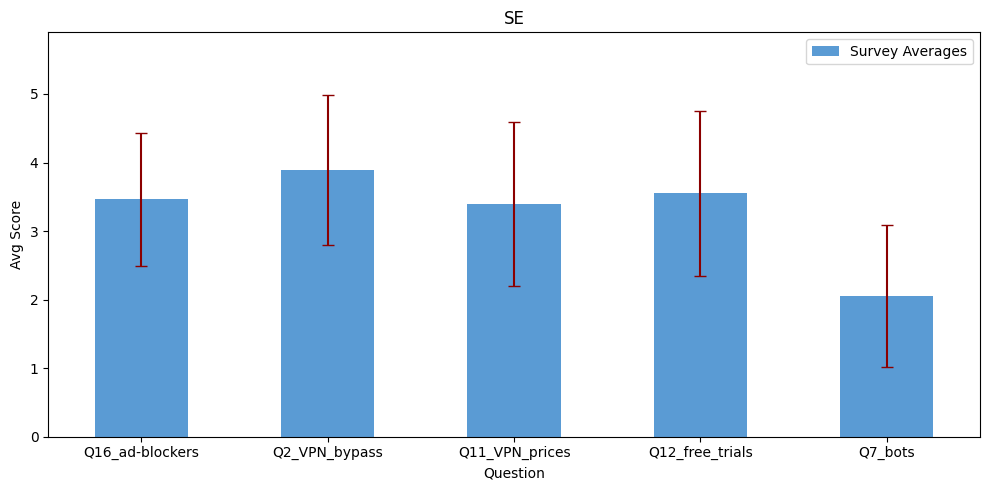

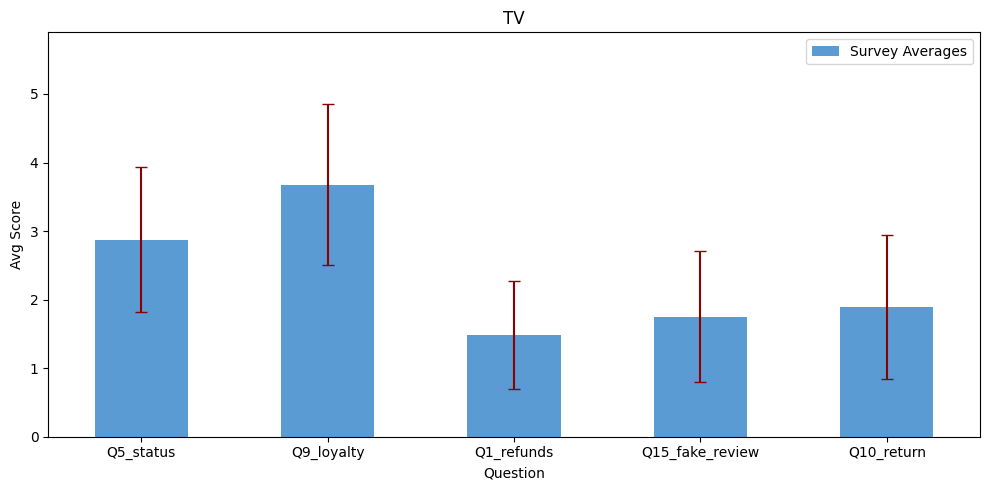

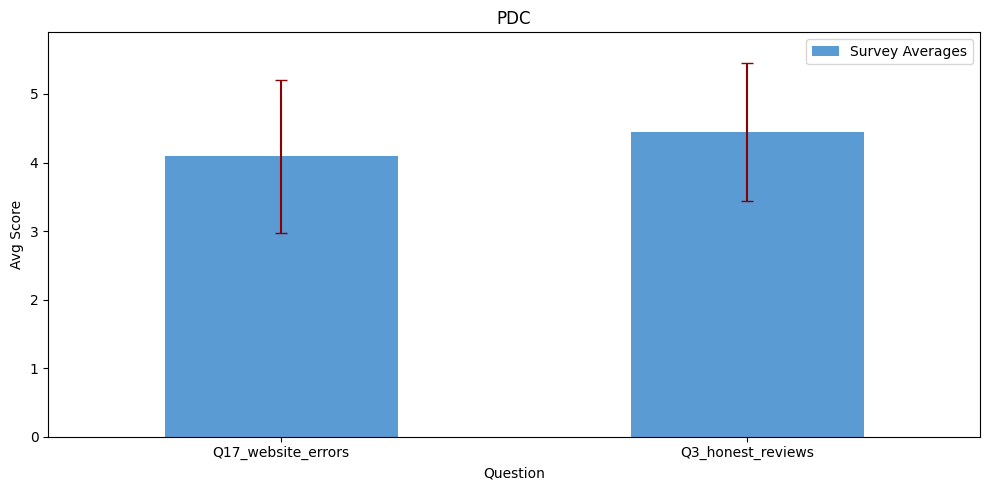

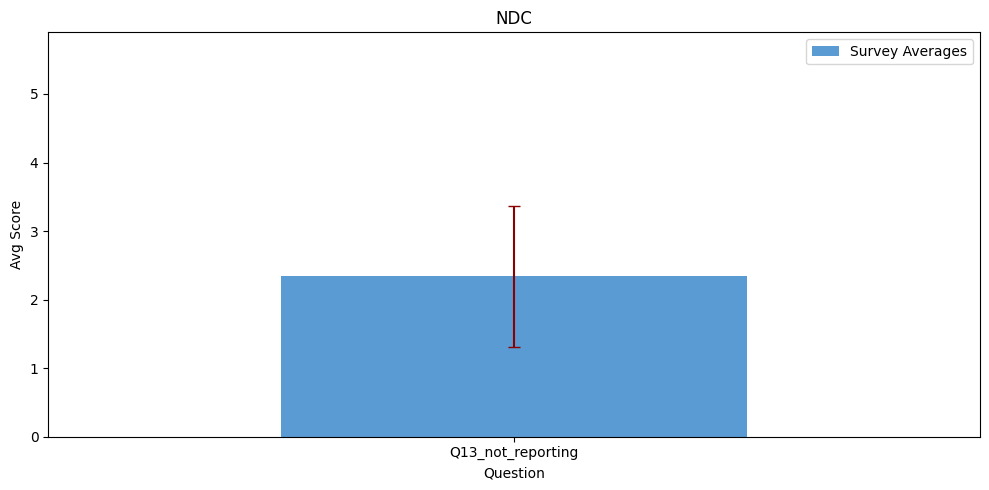

In [112]:
# Getting the question graphs (per category) of the survey data
images = make_graphs(survey_avgs, slices2, labels2, survey_errors, prefix="Survey Averages")

### Creating human vs LLMs graphs for new CES

In [113]:
survey_avgs

Q4_company-license    2.910714
Q14_subscritpion      3.571429
Q6_screenshots        2.732143
Q8_streaming          3.196429
Q16_ad-blockers       3.464286
Q2_VPN_bypass         3.892857
Q11_VPN_prices        3.392857
Q12_free_trials       3.553571
Q7_bots               2.053571
Q5_status             2.875000
Q9_loyalty            3.678571
Q1_refunds            1.482143
Q15_fake_review       1.750000
Q10_return            1.892857
Q17_website_errors    4.089286
Q3_honest_reviews     4.446429
Q13_not_reporting     2.339286
dtype: float64

In [114]:
gpt4o_avg

,Average,std
#,,
1,1.00,0.000000
2,1.15,0.358870
3,1.01,0.100000
4,1.00,0.000000
5,2.12,0.326599
6,3.01,0.173787
7,2.00,0.246183
8,1.13,0.337998
9,1.26,0.440844


In [115]:
gpt4o_std = pd.DataFrame(gpt4o_raw.groupby("#")["Response"].std())
gpt4o_std.rename({"Response":"STD"}, axis=1, inplace=True)
gpt4omini_std = pd.DataFrame(gpt4omini_raw.groupby("#")["Response"].std())
gpt4omini_std.rename({"Response":"STD"}, axis=1, inplace=True)
grok_std = pd.DataFrame(grok_raw.groupby("#")["Response"].std())
grok_std.rename({"Response":"STD"}, axis=1, inplace=True)

In [116]:
survey_errors.iloc[slices2[0]].values.mean()

1.2064308139134952

In [117]:
survey_errors.values[slices2[0]].mean()

1.2064308139134952

In [118]:
columns = ["GPT-4o", "GPT-4o-mini", "Grok", "Humans"]

category_averages = pd.DataFrame(index=labels2, columns=columns)
category_averages["GPT-4o"] = [gpt4o_avg.iloc[s, 0].mean() for s in slices2]
category_averages["GPT-4o-mini"] = [gpt4omini_avg.iloc[s, 0].mean() for s in slices2]
category_averages["Grok"] = [grok_avg.iloc[s, 0].mean() for s in slices2]
category_averages["Humans"] = [survey_avgs.values[s].mean() for s in slices2]

category_errors = pd.DataFrame(index=labels2, columns=columns)
category_errors["GPT-4o"] = [gpt4o_std.iloc[s, 0].mean() for s in slices2]
category_errors["GPT-4o-mini"] = [gpt4omini_std.iloc[s, 0].mean() for s in slices2]
category_errors["Grok"] = [grok_std.iloc[s, 0].mean() for s in slices2]
category_errors["Humans"] = [survey_errors.values[s].mean() for s in slices2]
# category_errors["Humans"] = [(survey_avgs.values[s].std() / np.sqrt(len(survey_avgs.values[s]))) for s in slices2]

In [119]:
category_errors

,GPT-4o,GPT-4o-mini,Grok,Humans
RM,0.114718,0.110211,0.127290,1.206431
SE,0.305082,0.323700,0.073691,1.100422
TV,0.118393,0.020000,0.048576,1.008087
PDC,0.050000,0.000000,0.000000,1.062018
NDC,0.000000,0.100000,0.140705,1.031800


In [120]:
# category_errors.loc["NDC"] = [0, 0, np.nan, 0, survey_errors.values[16]]

In [121]:
category_averages

,GPT-4o,GPT-4o-mini,Grok,Humans
RM,1.040,1.185,1.285,3.102679
SE,1.904,2.116,1.968,3.271429
TV,1.260,1.202,1.392,2.335714
PDC,4.995,5.000,5.000,4.267857
NDC,1.000,1.010,1.020,2.339286


In [122]:
survey_avgs.values

array([2.91071429, 3.57142857, 2.73214286, 3.19642857, 3.46428571,
       3.89285714, 3.39285714, 3.55357143, 2.05357143, 2.875     ,
       3.67857143, 1.48214286, 1.75      , 1.89285714, 4.08928571,
       4.44642857, 2.33928571])

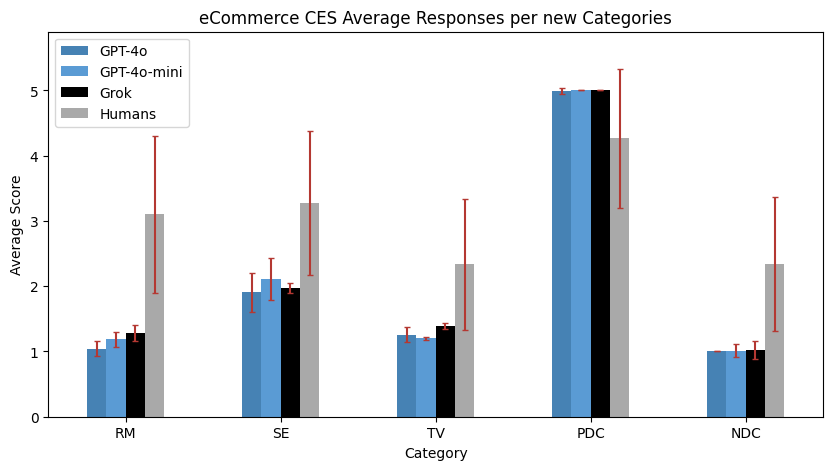

In [149]:
# create plot with error bars 
fig, ax = plt.subplots()
category_averages.plot(
    kind="bar",
    ylim=(0, 5.9),
    yerr=category_errors,
    capsize=2,
    ecolor="#B43832",
    color=["#4682b4", "#5a9bd4", "#000000", "#A9A9A9"],
    ax=ax,
    title="eCommerce CES Average Responses per new Categories",
    xlabel="Category",
    ylabel="Average Score",
    figsize=(10, 5),
    rot=0,
).legend(loc='upper left')

fig.savefig("e-commerce_averages.png")

In [132]:
column_oder2 = ["Q1_refunds", "Q15_fake_review", "Q7_bots", "Q5_status", "Q9_loyalty", "Q10_return", "Q13_not_reporting", 
                "Q4_company-license", "Q16_ad-blockers", "Q12_free_trials", "Q2_VPN_bypass", "Q11_VPN_prices",   "Q14_subscritpion", 
                "Q6_screenshots", "Q8_streaming", "Q3_honest_reviews", "Q17_website_errors",]
survey2 = survey[column_oder2]
survey2_avgs = survey2.mean()
survey2_errors = survey2.std()

In [136]:
survey2_avgs

Q1_refunds            1.482143
Q15_fake_review       1.750000
Q7_bots               2.053571
Q5_status             2.875000
Q9_loyalty            3.678571
Q10_return            1.892857
Q13_not_reporting     2.339286
Q4_company-license    2.910714
Q16_ad-blockers       3.464286
Q12_free_trials       3.553571
Q2_VPN_bypass         3.892857
Q11_VPN_prices        3.392857
Q14_subscritpion      3.571429
Q6_screenshots        2.732143
Q8_streaming          3.196429
Q3_honest_reviews     4.446429
Q17_website_errors    4.089286
dtype: float64

In [141]:
llms_row_order2 = [12, 13, 9, 10, 11, 14, 17, 1, 5, 8, 6, 7, 2, 3, 4, 15, 16]
llms_row_order2 = [i-1 for i in llms_row_order2]
gpt4o_avg2 = gpt4o_avg.iloc[llms_row_order2]
gpt4omini_avg2 = gpt4omini_avg.iloc[llms_row_order2]
grok_avg2 = grok_avg.iloc[llms_row_order2]

gpt4o_std2 = gpt4o_std.iloc[llms_row_order2]
gpt4omini_std2 = gpt4omini_std.iloc[llms_row_order2]
grok_std2 = grok_std.iloc[llms_row_order2]

In [142]:
grok_avg2

,Average,std
#,,
12,1.00,0.000000
13,1.00,0.000000
9,1.00,0.000000
10,1.00,0.000000
11,2.00,0.000000
14,1.96,0.242878
17,1.02,0.140705
1,1.00,0.000000
5,2.00,0.000000


In [139]:
slices3 = [slice(0,6), slice(6,7), slice(7,10), slice(10,13), slice(13,15), slice(15, None)]
labels3 = ["active", "passive", "questionable", "no harm", "downloading", "doing good"]

In [140]:
for i, sl in enumerate(slices3):
    print(f"{labels3[i]}:")
    print(survey2_avgs.iloc[sl])


active:
Q1_refunds         1.482143
Q15_fake_review    1.750000
Q7_bots            2.053571
Q5_status          2.875000
Q9_loyalty         3.678571
Q10_return         1.892857
dtype: float64
passive:
Q13_not_reporting    2.339286
dtype: float64
questionable:
Q4_company-license    2.910714
Q16_ad-blockers       3.464286
Q12_free_trials       3.553571
dtype: float64
no harm:
Q2_VPN_bypass       3.892857
Q11_VPN_prices      3.392857
Q14_subscritpion    3.571429
dtype: float64
downloading:
Q6_screenshots    2.732143
Q8_streaming      3.196429
dtype: float64
doing good:
Q3_honest_reviews     4.446429
Q17_website_errors    4.089286
dtype: float64


In [144]:
columns = ["GPT-4o", "GPT-4o-mini", "Grok", "Humans"]

category_averages2 = pd.DataFrame(index=labels3, columns=columns)
category_averages2["GPT-4o"] = [gpt4o_avg2.iloc[s, 0].mean() for s in slices3]
category_averages2["GPT-4o-mini"] = [gpt4omini_avg2.iloc[s, 0].mean() for s in slices3]
category_averages2["Grok"] = [grok_avg2.iloc[s, 0].mean() for s in slices3]
category_averages2["Humans"] = [survey2_avgs.values[s].mean() for s in slices3]

category_errors2 = pd.DataFrame(index=labels3, columns=columns)
category_errors2["GPT-4o"] = [gpt4o_std2.iloc[s, 0].mean() for s in slices3]
category_errors2["GPT-4o-mini"] = [gpt4omini_std2.iloc[s, 0].mean() for s in slices3]
category_errors2["Grok"] = [grok_std2.iloc[s, 0].mean() for s in slices3]
category_errors2["Humans"] = [survey2_errors.values[s].mean() for s in slices3]

In [145]:
category_averages2

,GPT-4o,GPT-4o-mini,Grok,Humans
active,1.260000,1.203333,1.326667,2.288690
passive,1.000000,1.010000,1.020000,2.339286
questionable,1.416667,1.586667,1.333333,3.309524
no harm,2.053333,2.450000,2.606667,3.619048
downloading,1.005000,1.000000,1.080000,2.964286
doing good,4.995000,5.000000,5.000000,4.267857


In [146]:
category_errors2

,GPT-4o,GPT-4o-mini,Grok,Humans
active,0.172135,0.084893,0.040480,1.012458
passive,0.000000,0.100000,0.140705,1.031800
questionable,0.221532,0.171610,0.000000,1.133884
no harm,0.259614,0.378385,0.169719,1.179888
downloading,0.050000,0.000000,0.184226,1.176103
doing good,0.050000,0.000000,0.000000,1.062018


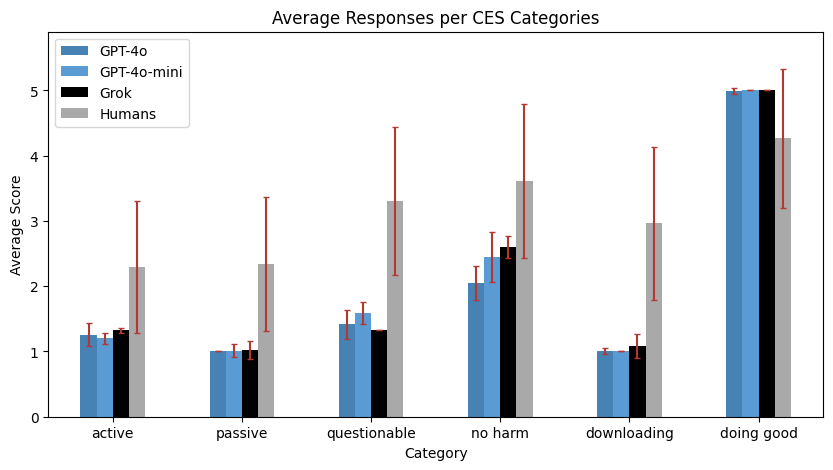

In [148]:
# create plot with error bars 
fig, ax = plt.subplots()
category_averages2.plot(
    kind="bar",
    ylim=(0, 5.9),
    yerr=category_errors2,
    capsize=2,
    ecolor="#B43832",
    color=["#4682b4", "#5a9bd4", "#000000", "#A9A9A9"],
    ax=ax,
    title="Average Responses per CES Categories",
    xlabel="Category",
    ylabel="Average Score",
    figsize=(10, 5),
    rot=0,
)

fig.savefig("e-commerce_old_categories_averages.png")